# Ebay Mac Price Regression Analysis


## 0.1 Intent

In this notebook I will perform multivariate linear regression analysis on data collected from eBay's API regarding the sale of Mac Minis in a 60-day time period. The script used to obtain this data is contained within this folder but is no longer functional due to API depreciation.

## 0.2 Data Description

Following data collection the data was manually cleaned by removing listings that did not pertain to Mac Minis, had irregular or None input for any of the features listed below (i.e. "16GB" for "Processor Speed"), or included additional items.


**listingType Values:**

- Auction
- FixedPrice (Indicates a Buy It Now offer)
- Store Inventory

**sellingState Values:**

- EndedWithSales
- EndedWithoutSales

**hoursToSale:** Duration (in hours) until sale or closing of the listing without sale.

**releaseYear:** Year the mac mini model was released. 

Only the years 2012, 2014, and 2018 were examined due to low counts of all other model years.

**processorSpeed:** Speed, in Gigahertz of the processor.

**Cores:** Number of core processors.

**Memory:** Size of RAM in GB.

**storageType:**

- 0 : HDD (Hard drive)
- 1 : SSD (Solid state drive)
- 3 : HDD/SSD (Both included)
- 4 : Fusion (A fusion drive)

**totalSale:** Sale price including shipping and tax.

## 1. Import Dataset

In [1]:
import pandas as pd  

dataset = pd.read_csv('/Users/kersh/Documents/Github/Portfolio/eBay Mac Price Regression/macmini.csv')

## 2. Preprocess Dataset 

Here I will only be looking at auction listings. In addition, for the purposes of this analysis I will only consider listings that ended in a successful sale.

Outliers with a sale price of >$2,000 are removed from the dataset (only 2 sold at a price this high).

In [2]:
sold = dataset.loc[dataset['sellingState'] == 'EndedWithSales']

auction = sold.loc[sold['listingType'] == 'Auction']

# Remove outliers
auction = auction[~(auction['totalSale'] > 2000)]

# Reset index
auction = auction.reset_index(drop=True)

# Remove listingType and sellingState columns
auction = auction.drop(['listingType','sellingState'],axis=1)

auction

,hoursToSale,totalSale,releaseYear,processorSpeed,Cores,Memory,storageType
0,0.2,152.80,2014,3.0,2,16,1
1,168.0,1200.00,2018,3.0,4,32,2
2,120.0,457.00,2014,1.4,2,4,1
3,168.0,653.15,2018,3.6,4,8,2
4,19.7,336.55,2014,3.0,2,16,3
...,...,...,...,...,...,...,...
576,120.0,438.00,2014,1.4,2,4,1
577,168.0,283.01,2014,2.6,2,8,1
578,120.0,285.00,2014,2.6,2,8,1
579,168.0,295.70,2014,2.6,2,8,1


## 3. Check for Multicollinearity

High or near-perfect correlation between two variables, known as multicollinearity, violates the assumptions of multiple regression and indicates reduced model accuracy. Variables were therefore checked for very high levels of correlation using a correlation matrix and heatmap.

In [3]:
# Calculate correlation matrix

corr = auction.corr()

display(corr)

,hoursToSale,totalSale,releaseYear,processorSpeed,Cores,Memory,storageType
hoursToSale,1.000000,0.032395,-0.072734,0.011696,0.014687,0.001964,-0.006808
totalSale,0.032395,1.000000,0.710926,0.453956,0.627411,0.665104,0.498971
releaseYear,-0.072734,0.710926,1.000000,0.461694,0.484664,0.341072,0.403189
processorSpeed,0.011696,0.453956,0.461694,1.000000,0.579078,0.431573,0.522509
Cores,0.014687,0.627411,0.484664,0.579078,1.000000,0.435096,0.506707
Memory,0.001964,0.665104,0.341072,0.431573,0.435096,1.000000,0.417104
storageType,-0.006808,0.498971,0.403189,0.522509,0.506707,0.417104,1.000000


<AxesSubplot:>

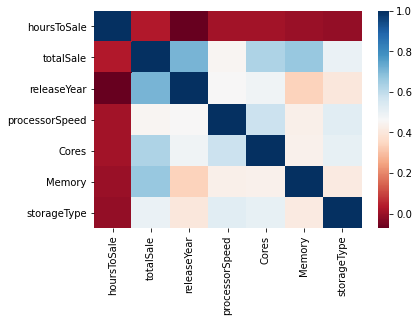

In [4]:
# Plot heatmap using Seaborn

import seaborn as sns

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

Aside from hoursToSale, which showed no noteworthy correlation with any other variables, all variables were correlated with each other to some extent, but not to a degree indicating multicollinearity (>80%). Therefore no further steps to remove multicollinearity were required.

## 4. View Descriptive Statistics


In [5]:
desc = auction.describe()
desc

,hoursToSale,totalSale,releaseYear,processorSpeed,Cores,Memory,storageType
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,129.958520,385.322771,2014.251291,2.254045,2.512909,8.130809,1.323580
std,54.197546,260.398313,1.811511,0.708134,0.874104,7.983394,0.558889
min,0.000000,25.000000,2012.000000,1.400000,2.000000,4.000000,1.000000
25%,120.000000,222.500000,2014.000000,1.400000,2.000000,4.000000,1.000000
50%,120.000000,335.000000,2014.000000,2.500000,2.000000,4.000000,1.000000
75%,168.000000,406.750000,2014.000000,2.600000,4.000000,8.000000,2.000000
max,240.000000,1690.000000,2018.000000,3.600000,4.000000,64.000000,4.000000


Of noteworthy interest here is the high sales price standard deviation of 260.39, compared to the mean sale price of 385.32. This high level of variability will present a challenge for the model to overcome in order to create meaningful and accurate sales price estimates.

## 5. Visualize the Data

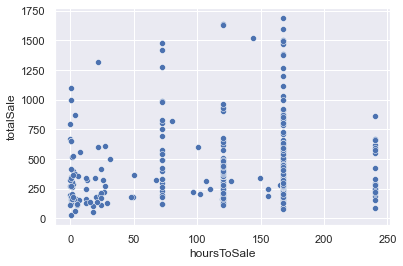

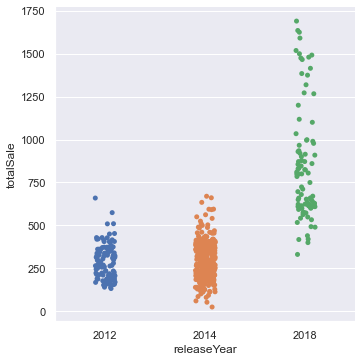

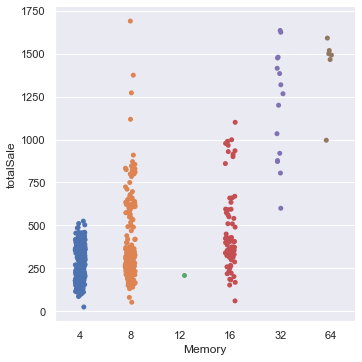

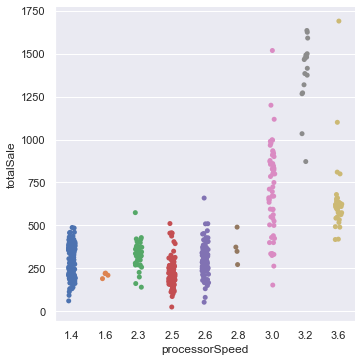

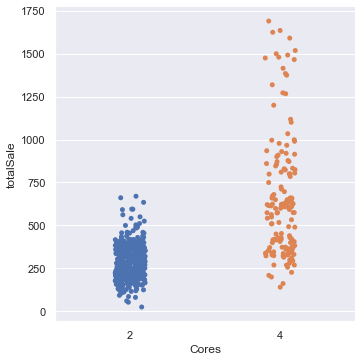

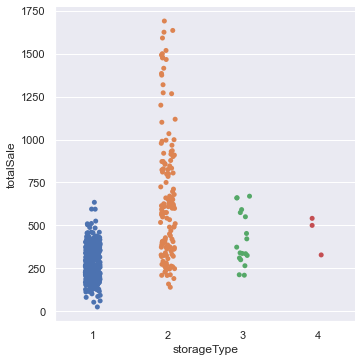

In [6]:
sns.set_theme(color_codes=True)

plot = sns.scatterplot(x="hoursToSale", y="totalSale", data=auction)

plot = sns.catplot(x="releaseYear", y="totalSale", data=auction) 

plot = sns.catplot(x="Memory", y="totalSale", data=auction)

plot = sns.catplot(x="processorSpeed", y="totalSale", data=auction)

plot = sns.catplot(x="Cores", y="totalSale", data=auction)

plot = sns.catplot(x="storageType", y="totalSale", data=auction)


## 6. Build Regression Model

### 6.1 Get Dummy Variables

Several variables in our model are categorical or best treated as such due to lack of continuity between values (release year, number of cores, and storage type). Because these variables cannot be directly entered into the regression model, they must first be converted to a series of one-hot encoded dummy variables. To prevent multicollinearity, the first column of each series of dummy variables is dropped.

In [7]:
year_dummies = pd.get_dummies(auction['releaseYear'],drop_first=True)
core_dummies = pd.get_dummies(auction['Cores'],drop_first=True)
storage_dummies = pd.get_dummies(auction['storageType'],drop_first=True)

### 6.2 Build the Complete Dataset

We now have everything we need to build the complete set of independent variables (X) and the target vector (Y).

In [8]:
X = [pd.DataFrame(auction[['hoursToSale','Memory','processorSpeed']]),year_dummies,core_dummies,storage_dummies]
X = pd.concat(X,axis=1)

Y = auction['totalSale']

### 6.3 Get Train and Test Sets

In order to ensure the results of our model generalize to data that the model was not trained on, it is best practice to split the data into train and test sets. This is done using scikitlearn's convenient test_train_split package.

In [9]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.25, random_state=1)

### 6.4 Instantiate and Fit the Model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(XTrain,YTrain)

LinearRegression()

### 6.5 View Intercept and Coefficients

In [11]:
print('Intercept: {}'.format(model.intercept_))
      
for c in model.coef_:
      print(c)

Intercept: 214.93719738723004
0.2929556342826053
12.964365735875063
-56.723796519234426
82.47345648019886
489.1375847282913
90.05985607384491
1.4522280589840788
98.32870286287502
104.58444162661739


## 7. Evaluate the Model

### 7.1 Rebuild the Model using statsmodels

In [12]:
import statsmodels.api as sm

# Adds a constant column to input
X2 = sm.add_constant(X, prepend=False)

regr = sm.OLS(Y, X2)

pred = regr.fit()

### 7.2 Test for Heteroscedasticity

When performing regression analysis it is important to check for heteroscedasticity. If it is present, this may indicate that coefficient estimates have reduced precision. Two tests are commonly used to detect heteroscedasticity in regression models: the Breusch-Pagan and White tests. Both tests attempt to reject the null hypothesis that there is no heteroscedasticity and product a p-value. For our purposes α = .05. 

Both tests are run using the statsmodels package.

In [13]:
from statsmodels.stats import diagnostic as diag

# Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(pred.resid, pred.model.exog)
print(pval, f_pval)
print('-'*100)

if pval > 0.05:
    print("Breusch-Pagan's Test:")
    print("P-value {:.4}".format(pval))
    print('No heteroscedasticity detected.')

else:
    print("Breusch-Pagan's Test:")
    print("p: {:.4}".format(pval))
    print('Heteroscedasticity detected.')
    
# White's test
_, pval, __, f_pval = diag.het_white(pred.resid, pred.model.exog)
print(pval, f_pval)
print('-'*100)

if pval > 0.05:
    print("White's Test:")
    print("p: {:.4}".format(pval))
    print('No heteroscedasticity detected.')
    
else:
    print("White's Test:")
    print("p: {:.4}".format(pval))
    print('Heteroscedasticity detected.')

1.6804160116947507e-10 4.146953495132328e-11
----------------------------------------------------------------------------------------------------
Breusch-Pagan's Test:
p: 1.68e-10
Heteroscedasticity detected.
7.912803525802802e-08 1.1741164970513362e-08
----------------------------------------------------------------------------------------------------
White's Test:
p: 7.913e-08
Heteroscedasticity detected.


Here both tests detected heteroscedasticity in our model. This makes intuitive sense with respect to the graphs produced in section 5 which show unequal variances in price among different groups. While this reduces the model's statistical validity to some extent, it does not make our model's prediction less useful in practice.

### 7.3 Test for Autocorrelation

Autocorrelation is present when errors are not independent of eachother, violating the assumptions of the model. Autocorrelation is tested using the Ljung-Box test.

In [14]:
# Calculate the lag
lag = min(10, (len(X)//5))
print('Number of lags: {}'.format(lag))
print('-'*100)

test_results = diag.acorr_ljungbox(pred.resid, lags = lag, return_df = False)

ibvalue, p_val = test_results

if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("No autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("Autocorrelation detected.")
    print('-'*100)

Number of lags: 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.1905
No autocorrelation.
----------------------------------------------------------------------------------------------------


### 7.4 Examine Residual Distribution and Mean

Residuals are plotted using a qq plot and checked for normality. Adherence to the line indicates normally-distributed residuals. The mean residual is calculated to ensure it equals or is very close to 0.

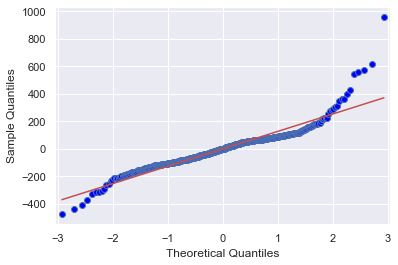

Mean residual: -3.643e-13


In [15]:
import pylab

# Plot residuals
sm.qqplot(pred.resid, line='s')
pylab.show()

# Check mean of residuals
mean_residuals = sum(pred.resid)/ len(pred.resid)
print("Mean residual: {:.4}".format(mean_residuals))

### 7.5 Model Metrics

In [16]:
print(pred.summary())

                            OLS Regression Results                            
Dep. Variable:              totalSale   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     204.3
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          4.04e-172
Time:                        14:01:13   Log-Likelihood:                -3637.3
No. Observations:                 581   AIC:                             7295.
Df Residuals:                     571   BIC:                             7338.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
hoursToSale        0.3074      0.099      3.

### 7.6 Error Measurements

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

YPred = model.predict(XTest)

# mean squared error
mse = mean_squared_error(YTest, YPred)

# mean absolute error
mae = mean_absolute_error(YTest, YPred)

# root mean squared error
rmse =  np.sqrt(mse)

# display the output
print("MSE {:.6}".format(mse))
print("MAE {:.6}".format(mae))
print("RMSE {:.6}".format(rmse))

MSE 13397.6
MAE 89.3917
RMSE 115.748


## 8. Repeated K-Fold Cross Validation

In order to validate the model against numerous training/test sets K-Fold cross validation is performed.

In [19]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedKFold(n_splits=10, n_repeats=3,random_state=1)

r2 = cross_val_score(model,X,Y,cv=cv,n_jobs=1,scoring='r2')
rmse = cross_val_score(model,X,Y,cv=cv,n_jobs=1,scoring='neg_root_mean_squared_error')

print('R2: {}'.format(np.mean(r2)))
print('RMSE: {}'.format(np.mean(rmse)))

R2: 0.7283601563606384
RMSE: -128.0057681237432


## 9. Conclusion

The multiple regression model yielded an adjusted R-squared of ~73%, indicating a moderately robust model. Although the RMSE indicated that on average the predicted value deviated from the true value by 128 USD, it must be considered that the standard deviation of price was 260 USD. Much of this variance which was not explained by the model likely includes factors such as image quality, listing quality, the quality of a used item being sold, and the inherent volatility of an auction-style sale. The model is therefore of some use in predicting the price at which a mac mini will sell for at auction on eBay.